<h1><u>Pre-processing and Training Data Development - Coffee Shop Capstone Project</u>

In previous notebooks I have already defined my problem, and cleaned the data set. The data set is from Kaggle and can be found [here](https://www.kaggle.com/datasets/patkle/coffeereviewcom-over-7000-ratings-and-reviews). The previously completed data cleaning notebook can be found [here](https://github.com/lindseyc735/Springboard/blob/main/Capstone%202/Capstone_2_data_wrangling.ipynb). Please see the below review of the project prior to considering the preprocessing and train/test split procedures.

<u>**Problem Statement:**</u>
<br>What features most affect the coffee rating?

<u>**Context:**</u>
<br>A start-up coffee company is creating their signature blend to sell alongside the more generic blends of coffee. The start-up needs to know what three features to primarily incorporate into their signature blend to maximize its popularity and distinguish their company from other coffee companies.

<u>**Criteria for Success:**</u>
<br>Determine the three coffee features that will create a popular, signature blend of coffee.

<u>**Scope of Solution Space:**</u>
<br>Rating
<br>Acidity
<br>Aftertaste
<br>Aroma
<br>Body
<br>Flavor
<br>Review description
<br>Country of origin
<br>Roast level
<br>Roaster
<br>Roaster location

Driving our exploration, consider the following hypotheses:  

<u>Null Hypothesis:</u> The three features that most affect the coffee rating are acidity_structure, roast_level, and country_origin. 
  
<u>Alternate Hypothesis:</u> The three features that most affect the coffee rating are not acidity_structure, roast_level, and country_origin.

In [1]:
import warnings
warnings.filterwarnings('ignore') # Removes deprecation warnings
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns # For all our visualization needs.
from pandas_profiling import ProfileReport # Creates data description, visuals, and missing value statistics for the data frame
from IPython.display import display
import os
# Import the data and review the first 5 entries and their features
coffee4 = pd.read_csv('coffee4.csv')
coffee4.head()

,rating,aftertaste,aroma,body,flavor,coffee_origin,roast_level,roaster,roaster_location
0,93,8.0,9.0,8.0,9.0,"Caranavi, Bolivia",Medium-Light,Red Rooster Coffee Roaster,"Floyd, Virginia"
1,92,8.0,9.0,8.0,9.0,"Matagalpa growing region, Nicaragua",Medium-Light,Eccentricity Coffee Co.,"Cleveland, Ohio"
2,94,8.0,9.0,9.0,9.0,"Agaro Gera, Jimma Zone, Oromia State, Ethiopia",Medium-Light,Mostra Coffee,"San Diego, California"
3,94,8.0,9.0,9.0,9.0,"Yirgacheffe growing region, southern Ethiopia",Medium-Light,Regent Coffee,"Glendale, California"
4,93,8.0,9.0,8.0,9.0,"La Sierra, Cauca Department, Colombia",Medium-Light,Merge Coffee Company,"Harrisonburg, Virginia"


In [2]:
# Review the feature datatypes 
coffee4.dtypes

rating                int64
aftertaste          float64
aroma               float64
body                float64
flavor              float64
coffee_origin        object
roast_level          object
roaster              object
roaster_location     object
dtype: object

array([[<AxesSubplot: title={'center': 'rating'}>,
        <AxesSubplot: title={'center': 'aftertaste'}>],
       [<AxesSubplot: title={'center': 'aroma'}>,
        <AxesSubplot: title={'center': 'body'}>],
       [<AxesSubplot: title={'center': 'flavor'}>, <AxesSubplot: >]],
      dtype=object)

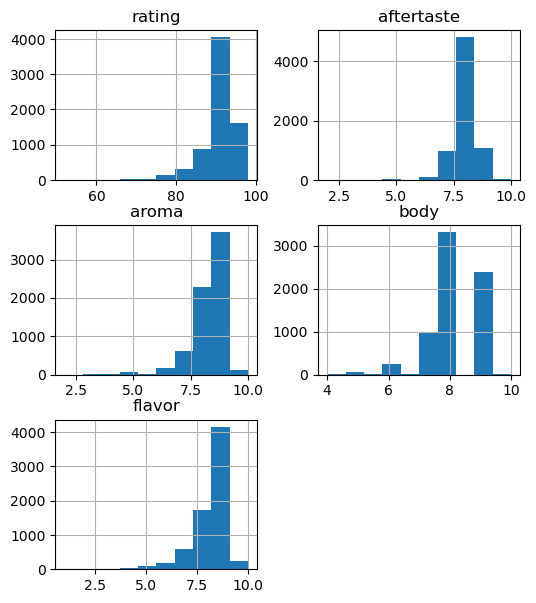

In [3]:
# View histograms of the numeric features 
coffee4.hist(figsize=(6, 7))

# Preprocessing and Training Data Development  
Goal: Create a cleaned development dataset I can use to complete the modeling step of this project.  
  
Steps:  
- Create dummy features
- Standardize the magnitude of numeric features using a scaler
- Split data into training and testing datasets

# Create dummy or indicator features for categorical variables

In [4]:
# Select the 'object' features
coffee4_objects = coffee4.select_dtypes(include=['object'])

# Create dummy features for the 'object' features
dummy = pd.get_dummies(coffee4_objects)

# Drop the original 'object' features, and concatenate the the numeric features in the original dataset with the dummy features
coffee4 = pd.concat([coffee4.drop(coffee4_objects, axis=1), dummy], axis=1)

# Standardize the magnitude of numeric features using a scaler  

In [5]:
# Isolate the features that are int64 or float64 to avoid standardizing the dummy variables
coffee4_numeric = coffee4.select_dtypes(include=['int64', 'float64'])

# Import StandardScaler()
from sklearn.preprocessing import StandardScaler

# Make a scaler object
scaler = StandardScaler()

# Fit the scaler on the data and transform it
scaled_coffee4 = scaler.fit_transform(coffee4_numeric)

# Convert the scaled_data array back to a DataFrame
scaled_coffee4 = pd.DataFrame(scaled_coffee4, columns=coffee4_numeric.columns)

In [6]:
# Drop the original numeric features
preprocessed_coffee4 = coffee4.drop(coffee4_numeric, axis=1)

#Concatenate the standardized features with the dummy features
preprocessed_coffee4 = pd.concat([scaled_coffee4, preprocessed_coffee4], axis=1)

In [7]:
preprocessed_coffee4.shape

(7037, 4174)

# Split into testing and training datasets
First I'll need to reorder my data so that my target feature is the last column.

In [8]:
# Set rating as the target column
target_column_name = 'rating'

# Get all column names except the target column
other_column_names = [col for col in preprocessed_coffee4.columns if col != target_column_name]

# Reorder the columns such that the target column is the last column
ordered_columns = other_column_names + [target_column_name]

# Create a new DataFrame with columns in the desired order
reordered_preprocessed_coffee4 = preprocessed_coffee4[ordered_columns]

reordered_preprocessed_coffee4.head()

,aftertaste,aroma,body,flavor,coffee_origin_20% Kona; other blend components not disclosed,coffee_origin_40% Colombia; 40% Brazil; 20% Rwanda,"coffee_origin_50% Colombia, 35% Ethiopia, 15% Sumatra",coffee_origin_50% Colombia; 50% Ethiopia,coffee_origin_50% Yirgacheffe Ethiopia; 25% Papua New Guinea; 25% Brazil,coffee_origin_A blend of coffees from southern India,...,"roaster_location_Youngstown, Ohio","roaster_location_Yuanlin, Taiwan","roaster_location_Yun-Lin County, Taiwan","roaster_location_Zhongli, Taiwan","roaster_location_Zhubei City, Taiwan","roaster_location_Zhubei, Taiwan","roaster_location_Zhuwei, Taiwan",roaster_location_Zimbabwe,"roaster_location_Zurich, Switzerland",rating
0,0.040738,0.700223,-0.111574,0.554627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.517301
1,0.040738,0.700223,-0.111574,0.554627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.274650
2,0.040738,0.700223,1.057494,0.554627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.759951
3,0.040738,0.700223,1.057494,0.554627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.759951
4,0.040738,0.700223,-0.111574,0.554627,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.517301


In [9]:
#Save the reordered and preprocessed data set
reordered_preprocessed_coffee4.to_csv('reordered_preprocessed_coffee4.csv', index=False)

Next, apply the sklearn feature train_test_split()

In [10]:
from sklearn.model_selection import train_test_split

X = reordered_preprocessed_coffee4.iloc[:, :-1]  # Features (all columns except the last one)
y = reordered_preprocessed_coffee4.iloc[:, -1]   # Target (last column)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
# Save the data
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)
